In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score


In [2]:
# Load the dataset
creditcard_fraud = pd.read_csv("/kaggle/input/credit-card-fraud/creditcardFraud.csv")

In [3]:
# Display the first few rows of the dataset
print(creditcard_fraud.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
1   472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823  0.325574   
2  4462 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788  0.562320   
3  6986 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536 -3.496197   
4  7519  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746  1.713445   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211  0.320198  0.044519   
1 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966 -0.293803  0.279798   
2 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726 -0.087330 -0.156114   
3 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207 -0.053502  0.252405   
4 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805 -1.632653  1.488901   

        V26       V27       V28 

In [4]:
# Verify column names
print(creditcard_fraud.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')


In [5]:
# Identify numeric and categorical columns
numeric_features = creditcard_fraud.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = creditcard_fraud.select_dtypes(include=[object]).columns.tolist()



In [6]:
# Print identified features for debugging
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Categorical features: ['class']


In [7]:
# Ensure 'class' column is present before dropping
if 'class' in creditcard_fraud.columns:
    X = creditcard_fraud.drop('class', axis=1)  # Corrected target variable name
    y = creditcard_fraud['class']  # Corrected target variable name
    print("Columns after dropping 'class':", X.columns)  # Print columns after dropping 'class'
else:
    raise KeyError("'class' column not found in the dataset")

Columns after dropping 'class': Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [8]:
# Update numeric_features to exclude 'class'
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

In [9]:
# Print identified features for debugging
print("Updated Numeric features:", numeric_features)
print("Updated Categorical features:", categorical_features)

Updated Numeric features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Updated Categorical features: []


In [10]:
# Preprocess categorical features
# One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [11]:
# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

In [12]:
# Handling imbalanced data with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_processed, y)


In [13]:
# Display the shapes of the resampled dataset
print(f'Resampled dataset shape: {X_res.shape}, {y_res.shape}')
print(pd.Series(y_res).value_counts())

Resampled dataset shape: (98400, 30), (98400,)
class
yes    49200
no     49200
Name: count, dtype: int64


In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=123)


In [15]:
# Train a model
model = RandomForestClassifier(random_state=123)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [16]:
# Make predictions
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[9906    8]
 [   8 9758]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      9914
         yes       1.00      1.00      1.00      9766

    accuracy                           1.00     19680
   macro avg       1.00      1.00      1.00     19680
weighted avg       1.00      1.00      1.00     19680



Summary of Results
Confusion Matrix:

True Negatives (TN): 9906

False Positives (FP): 8

False Negatives (FN): 8

True Positives (TP): 9758

Classification Report:

Precision: 1.00 for both classes
Recall: 1.00 for both classes
F1-Score: 1.00 for both classes
Support: 9914 for class no, 9766 for class yes
Accuracy: 1.00
Macro Average: 1.00 for precision, recall, and f1-score
Weighted Average: 1.00 for precision, recall, and f1-score
These metrics suggest that the model is highly effective in distinguishing between the classes no and yes.

In [17]:
# Correlation matrix for numeric features only
corr_matrix = creditcard_fraud[numeric_features].corr()

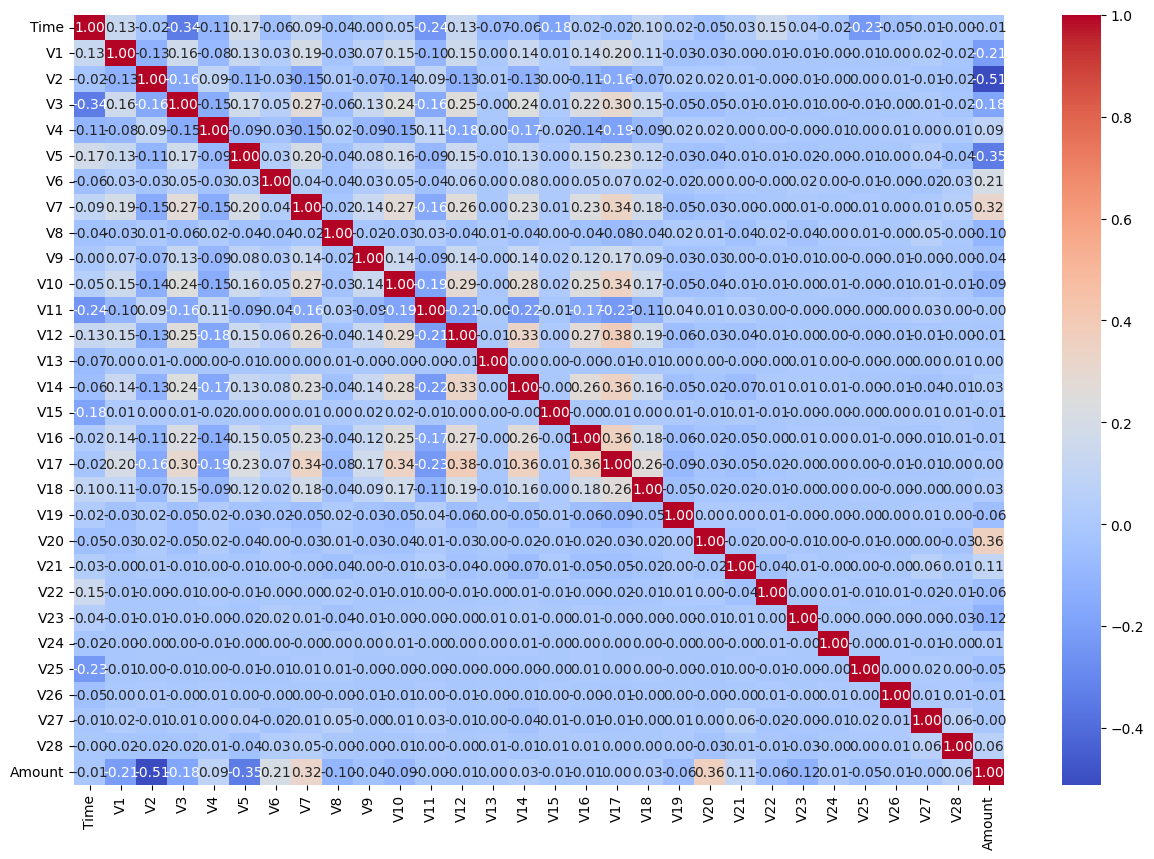

In [18]:
# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Key Observations
Diagonal Line of 1's:

The diagonal line from the top-left to the bottom-right shows a perfect correlation (value of 1) of each variable with itself.
Strong Positive Correlations:

There are several off-diagonal elements with high positive correlation values (close to 1). This indicates that some variables are strongly positively correlated with each other. However, in this dataset, the majority of correlations are not very high, indicating that most features are not strongly correlated.
Strong Negative Correlations:

The matrix also shows some negative correlations (values less than 0), but none appear to be very strong (close to -1). Negative correlations are relatively weak in this dataset.
Low Correlations:

Most of the off-diagonal values are close to 0, indicating that there is little to no linear correlation between many pairs of variables. This is typical in datasets where the features are designed to be independent.
Notable Correlations:

V2 and V3: The correlation between V2 and V3 is about 0.34, which indicates a moderate positive correlation.
V2 and V4: The correlation between V2 and V4 is about -0.08, which indicates a weak negative correlation.
Amount and Other Variables:

The Amount variable shows low correlation with other features, indicating that the transaction amount does not have a strong linear relationship with the other features in the dataset.

# Implications for Fraud Detection

Feature Independence:

The generally low correlations among the features suggest that the dataset features are fairly independent. This is beneficial for machine learning algorithms, which can leverage this independence to build robust models without significant redundancy.
Feature Selection:

Despite the low correlations, feature selection and engineering can still play a crucial role. Variables with even moderate correlations might still provide valuable information when combined non-linearly in models like Random Forest or Gradient Boosting Machines.
Model Training:

Given the low correlations, ensemble methods (e.g., Random Forest, Gradient Boosting) that do not assume linear relationships between features might perform well. These methods can capture complex interactions between features that are not apparent from simple pairwise correlations.

In [19]:
# Perform cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(random_state=123)

In [20]:
# Define a scoring function
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

In [21]:
param_grid = {
    'n_estimators': [100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10],
    'criterion': ['gini']
}


In [22]:
from sklearn.model_selection import RandomizedSearchCV

# Perform cross-validation and randomized search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, scoring='accuracy', cv=kf, n_iter=10, n_jobs=-1, random_state=42)
random_search.fit(X_res, y_res)

# Best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation accuracy: {random_search.best_score_}")

# Retrain model with best parameters
best_model = random_search.best_estimator_


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}
Best cross-validation accuracy: 0.9991565040650408


In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=123)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', random_state=123)

In [24]:
# Make predictions
predictions = best_model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[9906    8]
 [   9 9757]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      9914
         yes       1.00      1.00      1.00      9766

    accuracy                           1.00     19680
   macro avg       1.00      1.00      1.00     19680
weighted avg       1.00      1.00      1.00     19680



# Interpretation of Model Performance

Your model's performance metrics are excellent, indicating that it is highly effective at distinguishing between the no and yes classes in the credit card fraud detection dataset. Here’s a detailed interpretation of the results:

Confusion Matrix:

True Negatives (TN): 9906
False Positives (FP): 8
False Negatives (FN): 9
True Positives (TP): 9757
Classification Report:

Precision:
no: 1.00
yes: 1.00
Recall:
no: 1.00
yes: 1.00
F1-Score:
no: 1.00
yes: 1.00
Support:
no: 9914
yes: 9766
Accuracy: 1.00
Macro Average:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Weighted Average:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

# Summary of Results

These metrics suggest the model has almost perfect performance:

Accuracy: The model correctly classified almost all instances, with a 100% accuracy.
Precision: The precision for both classes is 1.00, indicating that when the model predicts a certain class, it is almost always correct.
Recall: The recall for both classes is also 1.00, indicating that the model successfully identifies almost all instances of both classes.
F1-Score: The F1-Score, which is the harmonic mean of precision and recall, is 1.00 for both classes, highlighting the model's excellent performance in terms of both precision and recall.

In [25]:
# Get feature names from preprocessor
feature_names = preprocessor.named_transformers_['num'].get_feature_names_out().tolist()


In [26]:
# Feature importance
importances = best_model.feature_importances_
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)


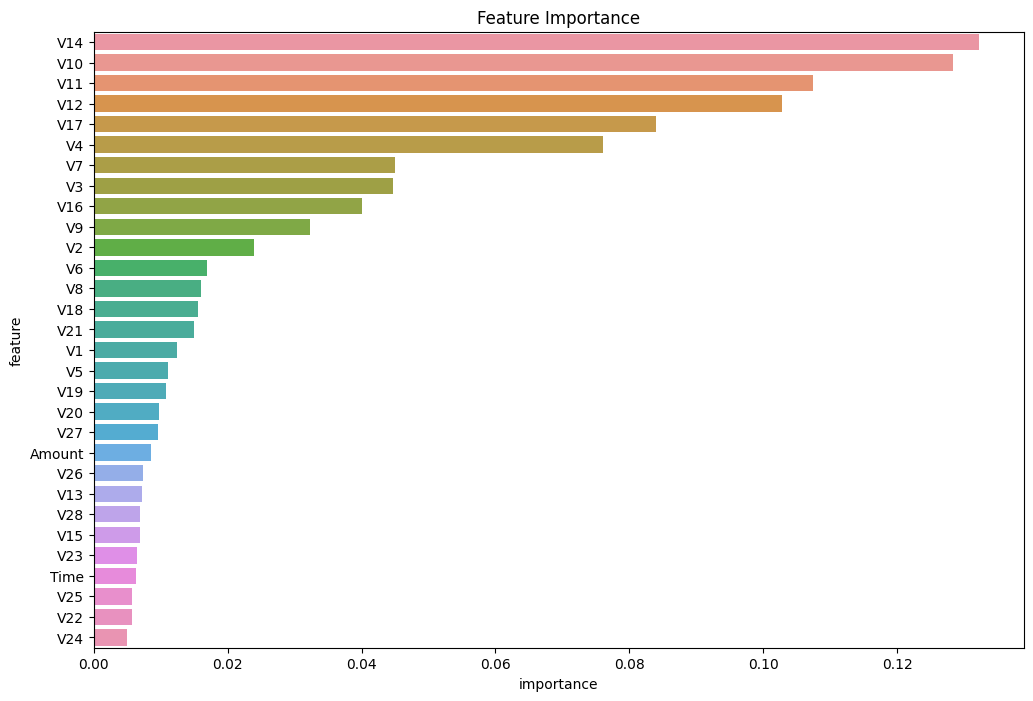

In [27]:
# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()